In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
testData = pd.read_csv('data/test.csv')
trainData = pd.read_csv('data/train.csv')
storeData = pd.read_csv('data/store.csv')
sampleData = pd.read_csv('data/sample_submission.csv')

C:\Users\Yunus\AppData\Local\Temp\ipykernel_14044\664267924.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trainData = pd.read_csv('data/train.csv')


In [26]:
testData.shape

(41088, 8)

In [27]:
sampleData.shape

(41088, 2)

## Task 1

In [28]:
def summarize_data(df):
    # Basic Information
    print("Basic Information:")
    df.info()  # info prints directly
    print(df.describe(include='all'))
    print(df.isnull().sum())

    # Specific Summarizations
    print("\nSpecific Summarizations:")
    print(f'Number of records: {df.shape[0]}')
    print('Number of unique values per column:')
    print(df.nunique())

    for column in df.columns:
        col = df[column]
        if col.dtype == 'object':
            print(f'\nTop 5 most frequent values in column "{column}":')
            print(col.value_counts().head())
        elif col.dtype in ['int64', 'float64']:
            total = col.sum()
            mean = col.mean()
            print(f'\nTotal of column "{column}": {total}')
            print(f'Mean of column "{column}": {mean:.2f}')
            # Use try/except to check if conversion to datetime is possible without extra computations
            try:
                dt_series = pd.to_datetime(col, errors='raise')
                messages_per_period = dt_series.dt.to_period('M').value_counts().sort_index()
                print(f'\nNumber of records per month for column "{column}":')
                print(messages_per_period)
            except Exception:
                pass

    numeric_columns = df.select_dtypes(include=['number'])
    if not numeric_columns.empty:
        first_numeric = numeric_columns.columns[0]
        top_records = df.nlargest(5, first_numeric)
        print('\nTop 5 records by the first numerical column:')
        print(top_records)
    else:
        print('\nNo numerical columns to display top records.')


In [29]:
summarize_data(testData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
                  Id         Store     DayOfWeek        Date          Open  \
count   41088.000000  41088.000000  41088.000000       41088  41077.000000   
unique           NaN           NaN           NaN          48           NaN   
top              NaN           NaN           NaN  2015-09-17           NaN   
freq             NaN           NaN           NaN         85

In [30]:
summarize_data(storeData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
             Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique     

In [31]:
summarize_data(trainData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
               Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2013-01-02           NaN           NaN   
freq       

In [32]:
# lets see on four data missing values and drop them

trainData = trainData.dropna()
storeData = storeData.dropna() 

summarize_data(storeData)
summarize_data(trainData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1 to 1110
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      365 non-null    int64  
 1   StoreType                  365 non-null    object 
 2   Assortment                 365 non-null    object 
 3   CompetitionDistance        365 non-null    float64
 4   CompetitionOpenSinceMonth  365 non-null    float64
 5   CompetitionOpenSinceYear   365 non-null    float64
 6   Promo2                     365 non-null    int64  
 7   Promo2SinceWeek            365 non-null    float64
 8   Promo2SinceYear            365 non-null    float64
 9   PromoInterval              365 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 31.4+ KB
              Store StoreType Assortment  CompetitionDistance  \
count    365.000000       365        365           365.000000   
unique         

In [33]:
def univariate_analysis(df):
    for col_name, column in df.items():
        print(f"Analysis for column: {col_name}")
        fig, ax = plt.subplots(figsize=(10, 6))
        
        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30, ax=ax)
            ax.set(title=f'Histogram of {col_name}', xlabel=col_name, ylabel='Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line', ax=ax)
            ax.set(title=f'Time Series of {col_name}', xlabel='Date', ylabel='Frequency')
        else:
            column.value_counts().plot(kind='bar', ax=ax)
            ax.set(title=f'Bar Plot of {col_name}', xlabel=col_name, ylabel='Frequency')
        
        plt.show()
        print("\n")


Analysis for column: Store


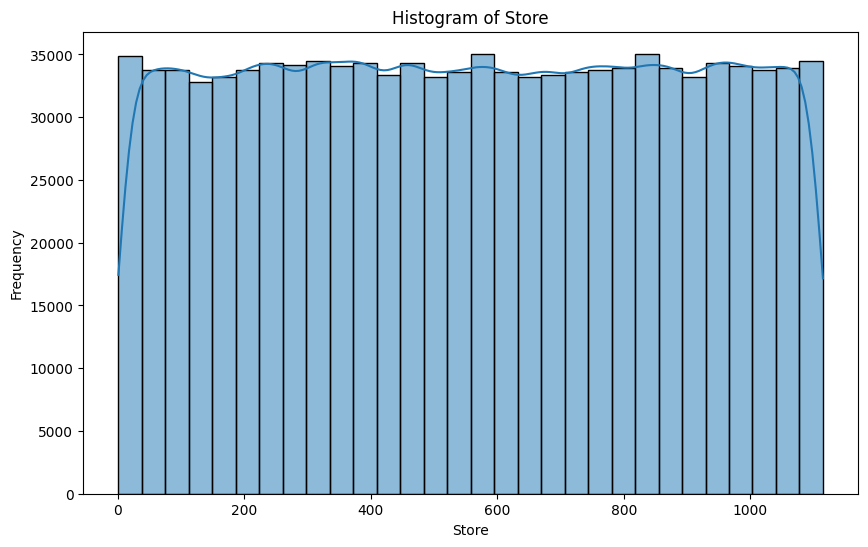



Analysis for column: DayOfWeek


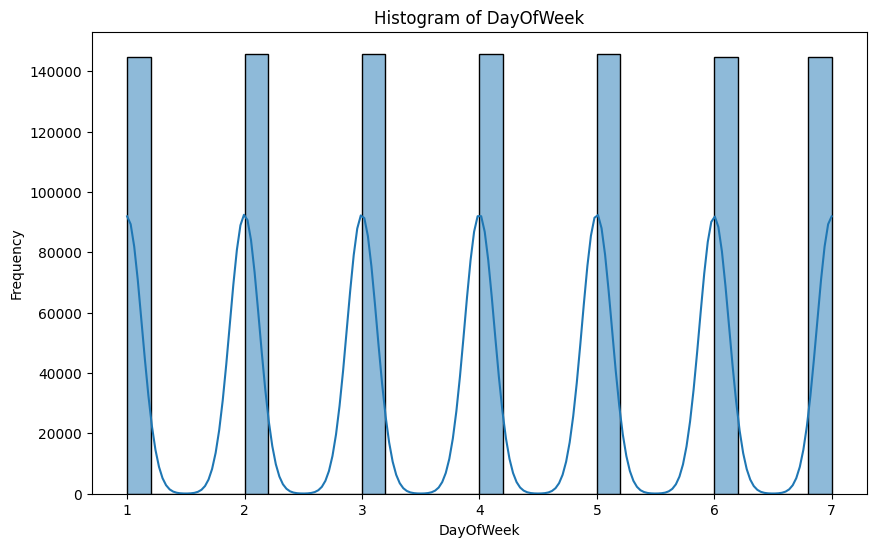



Analysis for column: Date


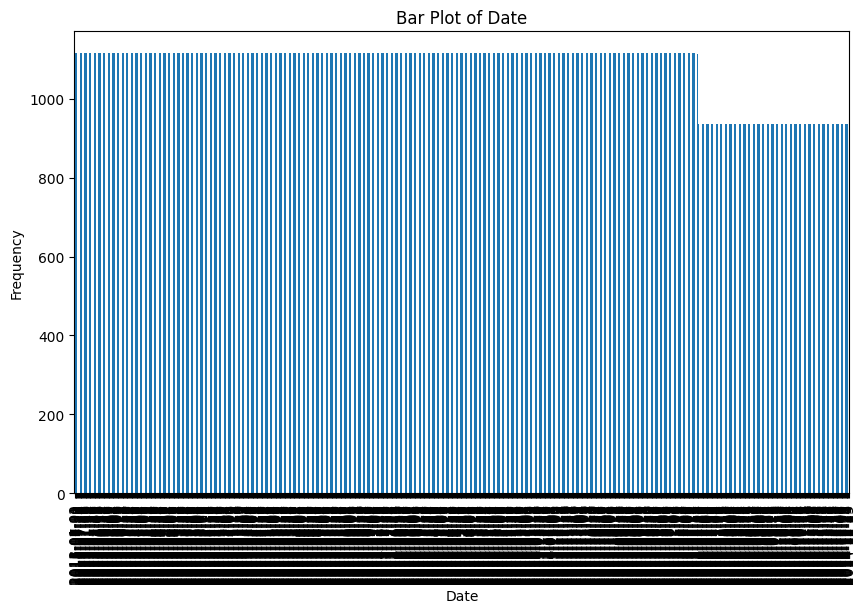



Analysis for column: Sales


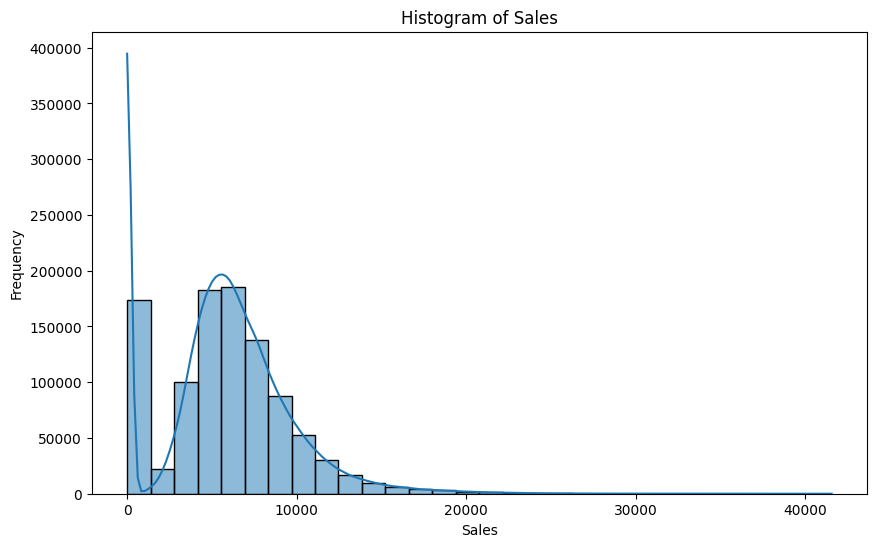



Analysis for column: Customers


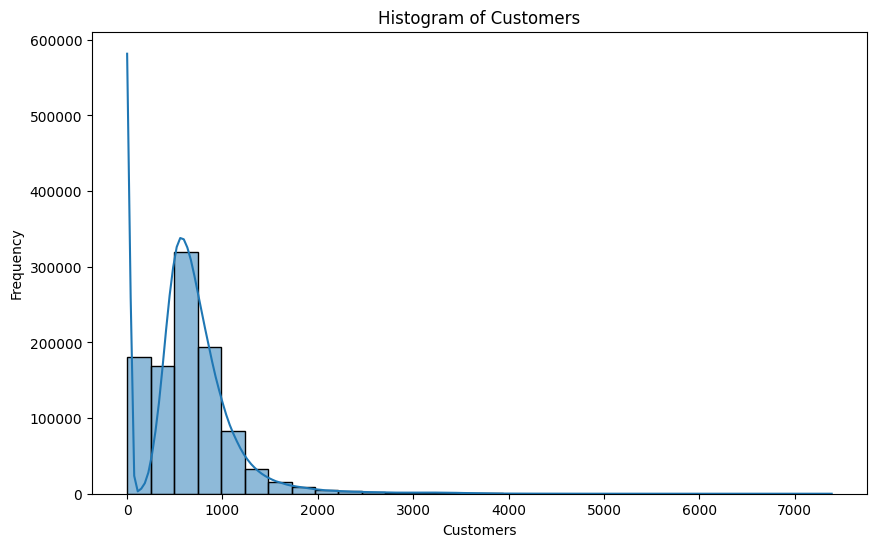



Analysis for column: Open


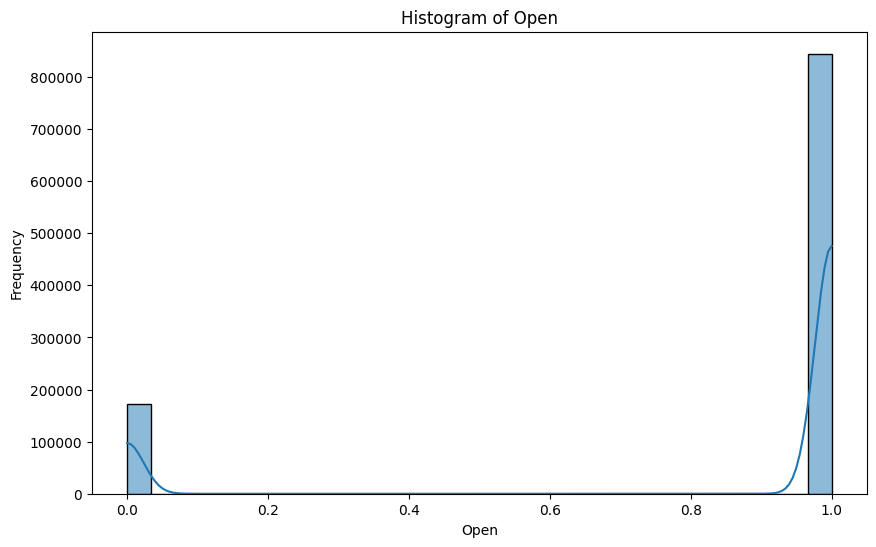



Analysis for column: Promo


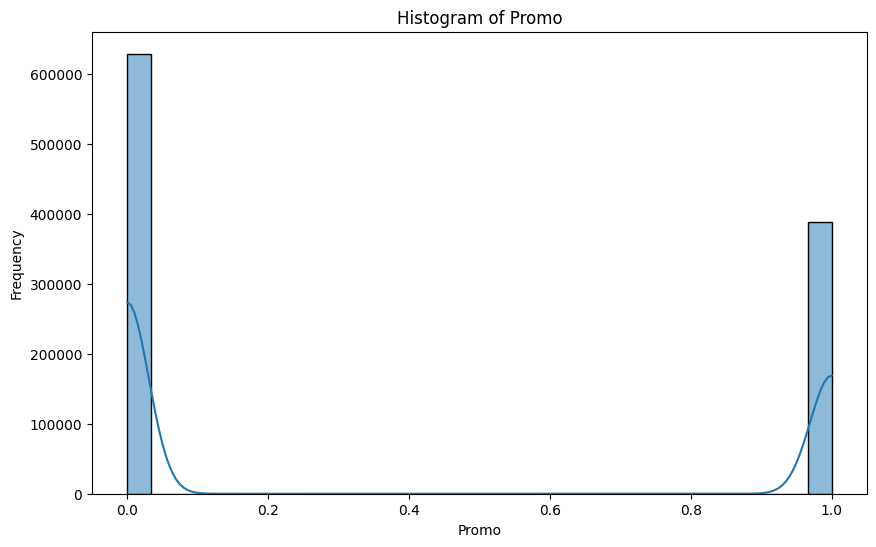



Analysis for column: StateHoliday


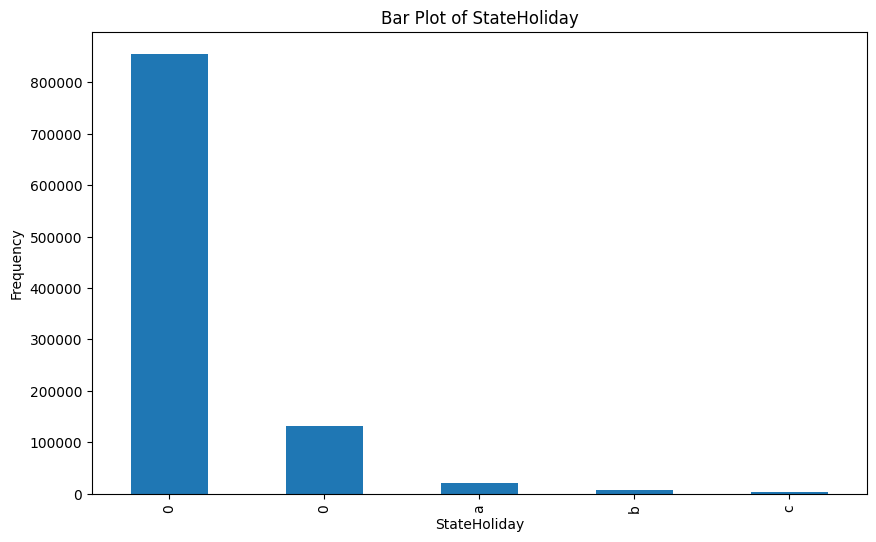



Analysis for column: SchoolHoliday


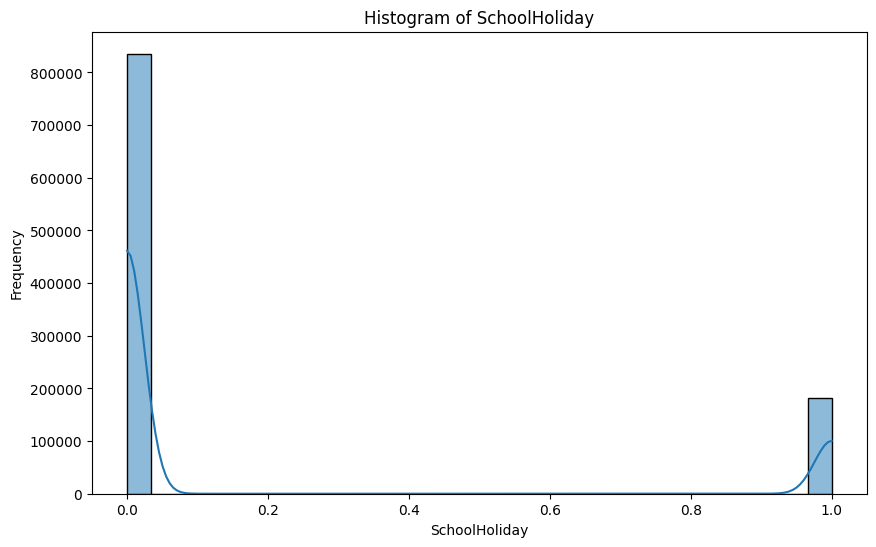

In [34]:
univariate_analysis(trainData)

Analysis for column: Id


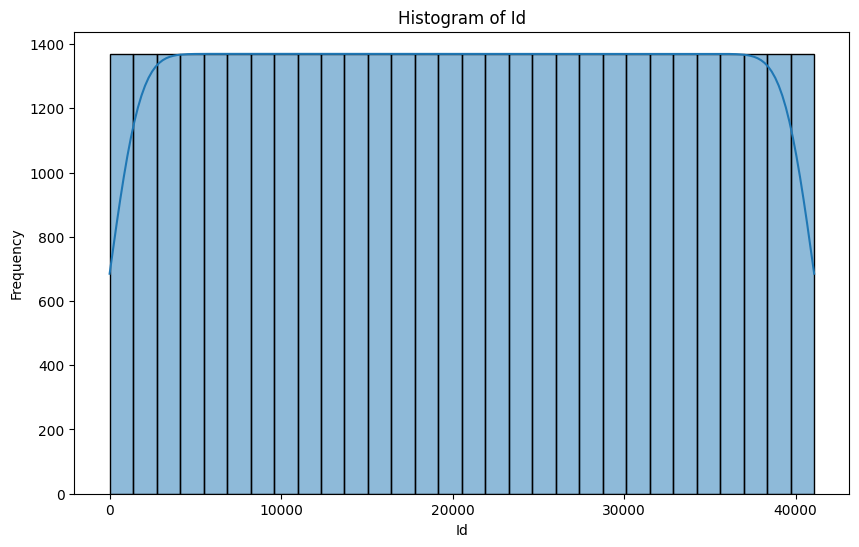



Analysis for column: Store


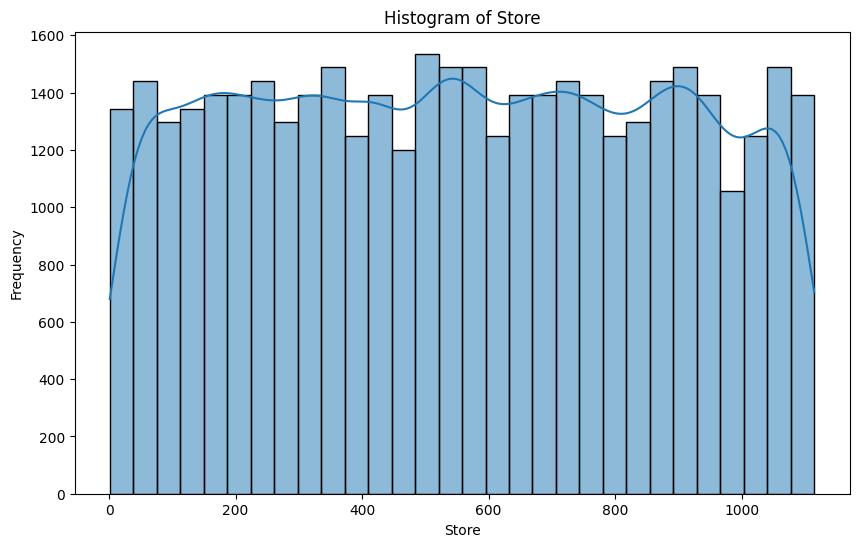



Analysis for column: DayOfWeek


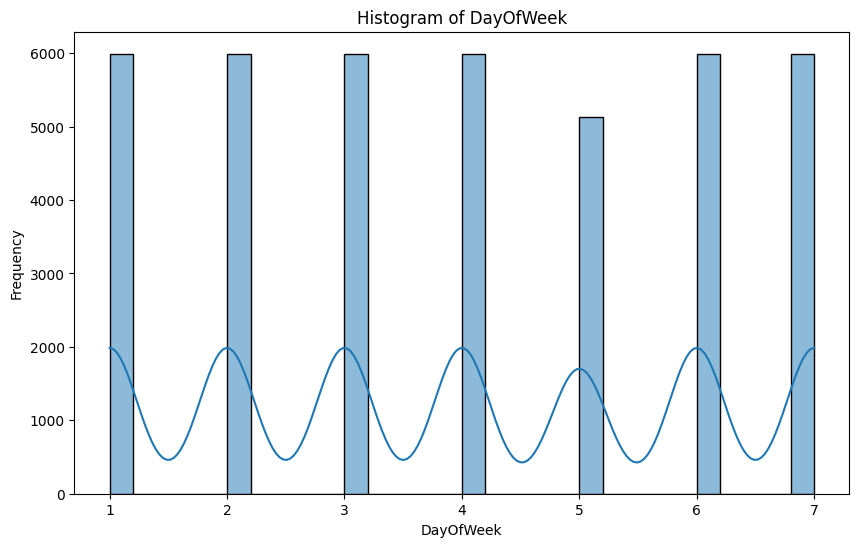



Analysis for column: Date


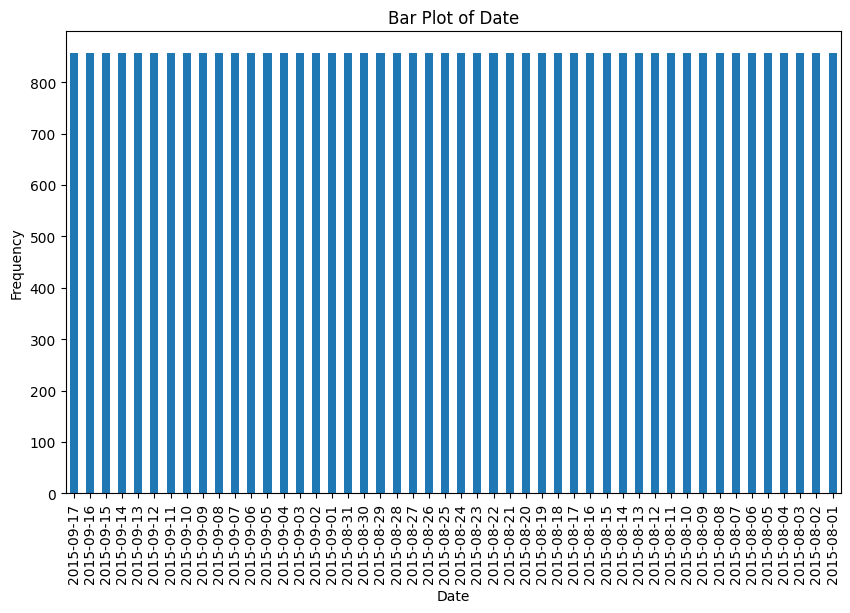



Analysis for column: Open


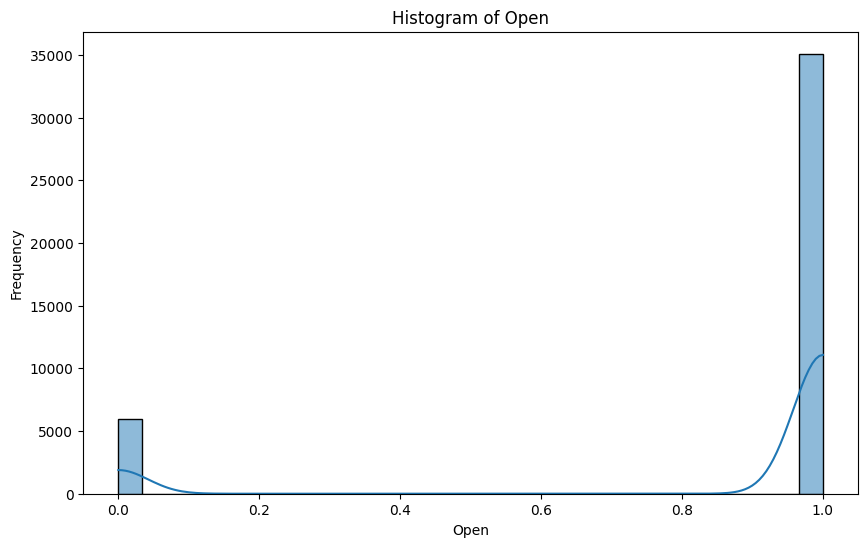



Analysis for column: Promo


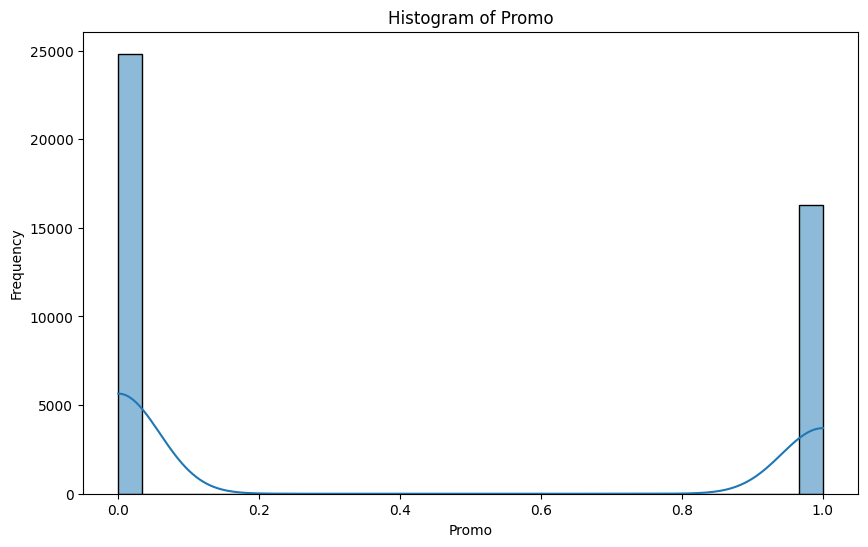



Analysis for column: StateHoliday


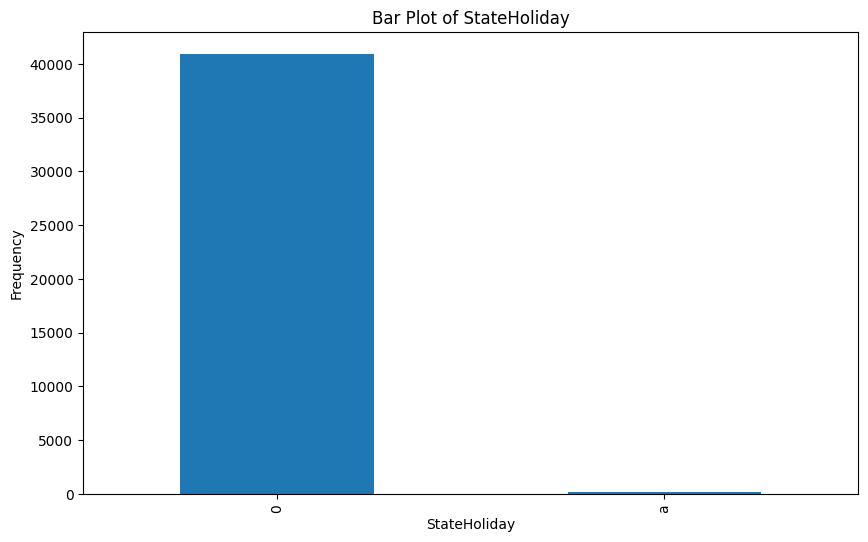



Analysis for column: SchoolHoliday


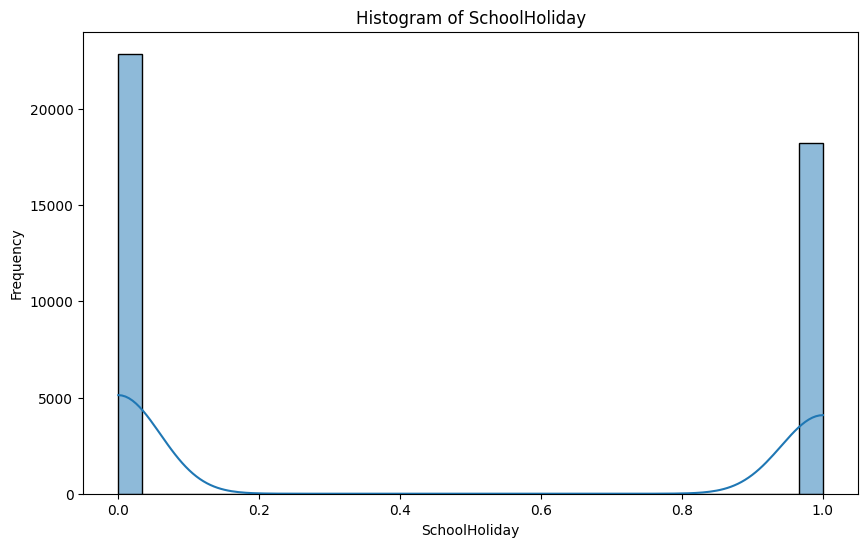

In [35]:
univariate_analysis(testData)

In [36]:
#Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

train_promo = trainData['Promo'].value_counts(normalize=True)
test_promo = testData['Promo'].value_counts(normalize=True)

print(train_promo)
print(test_promo)

Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


In [37]:
# Check & compare sales behavior before, during, and after holidays

trainData['Date'] = pd.to_datetime(trainData['Date'])
trainData['Year'] = trainData['Date'].dt.year
trainData['Month'] = trainData['Date'].dt.month

trainData['Holiday'] = trainData['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
trainData['Holiday'] = trainData['Holiday'].shift(-1)
trainData['Holiday'] = trainData['Holiday'].fillna(0)

trainData['Holiday'] = trainData['Holiday'].astype(int)

trainData['Holiday'].value_counts()

trainData['Sales'].groupby(trainData['Holiday']).mean()

trainData['Sales'].groupby(trainData['Month']).mean()

trainData['Sales'].groupby(trainData['Year']).mean()



Year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64

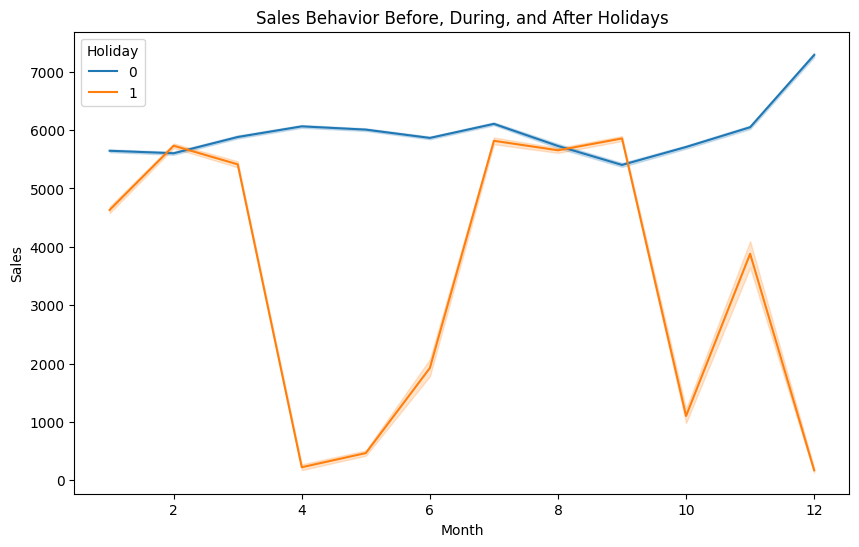

In [38]:
# Visualize the sales behavior before, during, and after holidays

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=trainData, x='Month', y='Sales', hue='Holiday', ax=ax)
ax.set(title='Sales Behavior Before, During, and After Holidays', xlabel='Month', ylabel='Sales')
plt.show()

In [39]:
# Find out any seasonal (Christmas, Easter, etc) purchase behaviors

trainData['Sales'].groupby(trainData['Month']).mean()



Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64

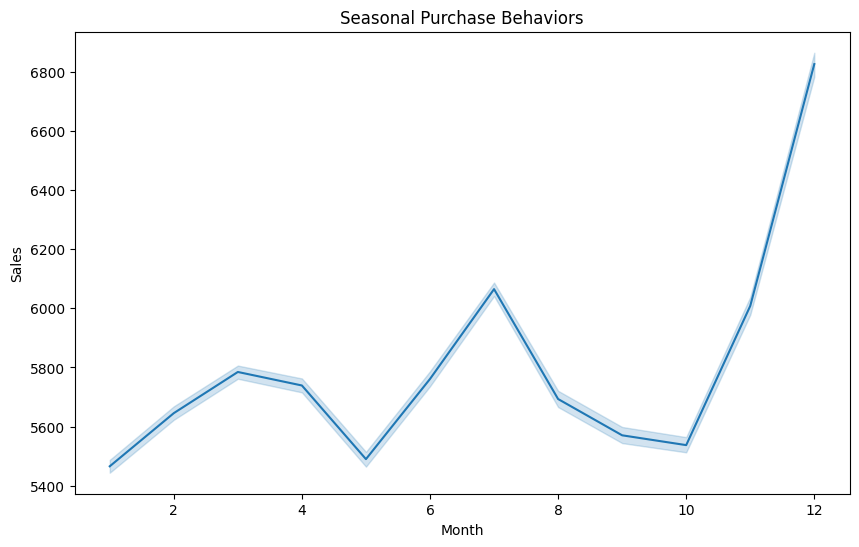

In [40]:
# Visualize the seasonal purchase behaviors

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=trainData, x='Month', y='Sales', ax=ax)
ax.set(title='Seasonal Purchase Behaviors', xlabel='Month', ylabel='Sales')
plt.show()

In [41]:
# What can you say about the correlation between sales and the number of customers?

trainData['Customers'].corr(trainData['Sales'])


np.float64(0.8947107733016959)

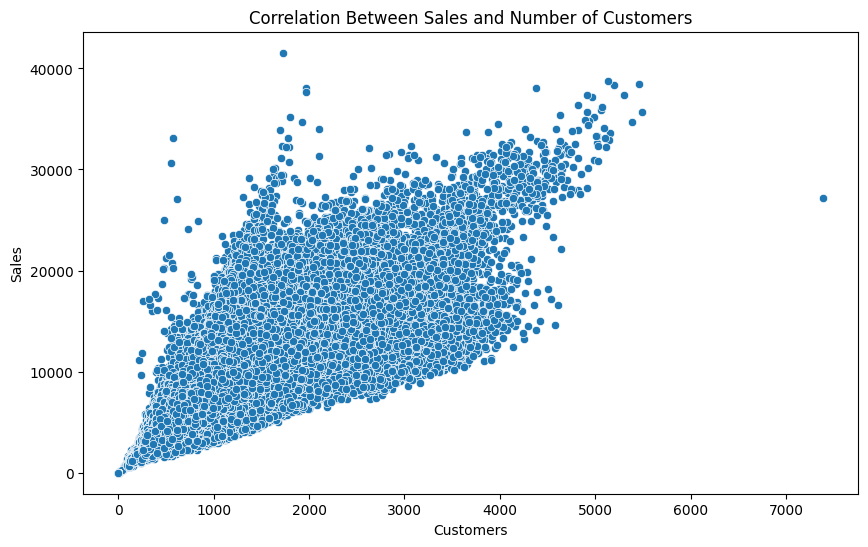

In [42]:
# Visualize the correlation between sales and the number of customers

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=trainData, x='Customers', y='Sales', ax=ax)
ax.set(title='Correlation Between Sales and Number of Customers', xlabel='Customers', ylabel='Sales')
plt.show()

In [43]:
# Convert Sales and Customers columns to numeric in case they were misinterpreted as datetime
trainData['Sales'] = pd.to_numeric(trainData['Sales'], errors='coerce')
trainData['Customers'] = pd.to_numeric(trainData['Customers'], errors='coerce')
promo_groups = trainData.groupby('Promo')

# Calculate average sales and average number of customers for each group
avg_sales = promo_groups['Sales'].mean()
avg_customers = promo_groups['Customers'].mean()

print("Average Sales with and without Promotions:")
print(avg_sales)
print("\nAverage Customers with and without Promotions:")
print(avg_customers)

# Calculate average sales per customer for each group
avg_sales_per_customer = avg_sales / avg_customers

print("\nAverage Sales per Customer with and without Promotions:")
print(avg_sales_per_customer)


Average Sales with and without Promotions:
Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

Average Customers with and without Promotions:
Promo
0    517.823542
1    820.098815
Name: Customers, dtype: float64

Average Sales per Customer with and without Promotions:
Promo
0    8.508788
1    9.744133
dtype: float64


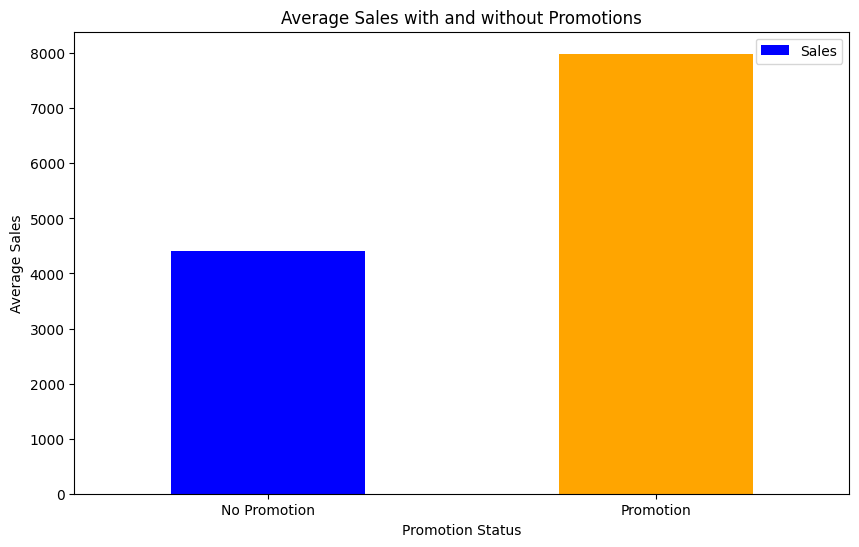

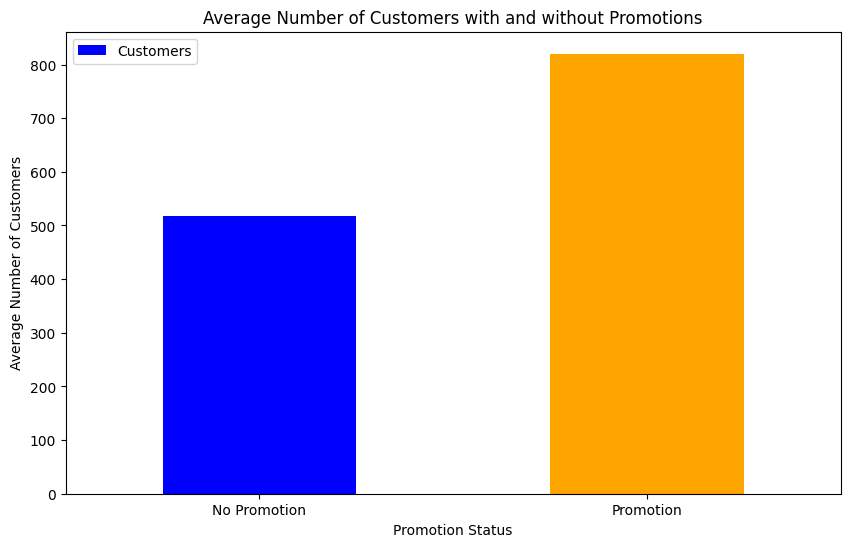

C:\Users\Yunus\AppData\Local\Temp\ipykernel_14044\138309747.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


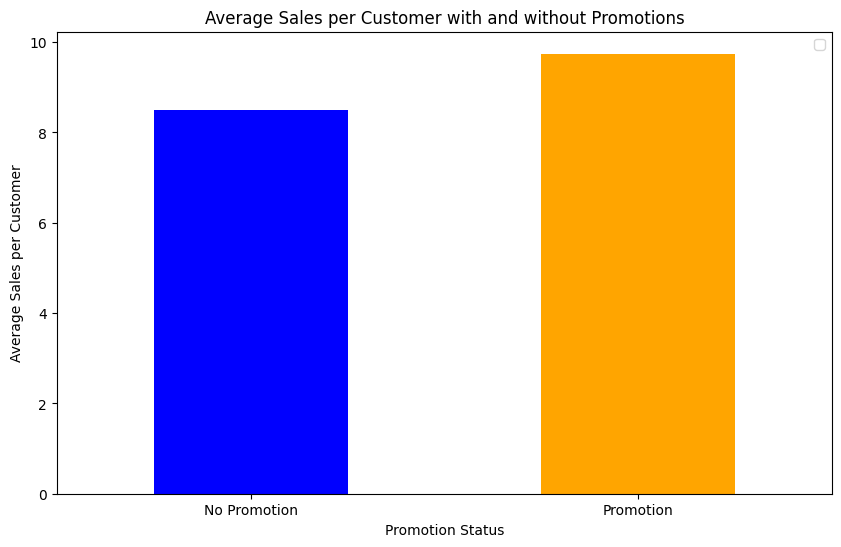

In [44]:

# Plotting average sales with and without promotions
plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average number of customers with and without promotions
plt.figure(figsize=(10, 6))
avg_customers.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Customers with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average sales per customer with and without promotions
plt.figure(figsize=(10, 6))
avg_sales_per_customer.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales per Customer with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales per Customer')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

In [45]:
# Which stores are open on all weekdays? How does that affect their sales on weekends?

storeData['DayOfWeek'] = storeData['Promo2SinceWeek'].apply(lambda x: 1 if x != 0 else 0)

storeData['DayOfWeek'].value_counts()





DayOfWeek
1    365
Name: count, dtype: int64

In [47]:

open_hours_data = trainData[trainData['Open'] == 1].copy()
open_hours_data.set_index('Date', inplace=True)
time_window = pd.Timedelta(hours=1)
avg_customers_before_open = open_hours_data['Customers'].rolling(window=time_window, closed='right').mean()
avg_customers_after_close = open_hours_data['Customers'].rolling(window=time_window, closed='left').mean()


C:\Users\Yunus\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


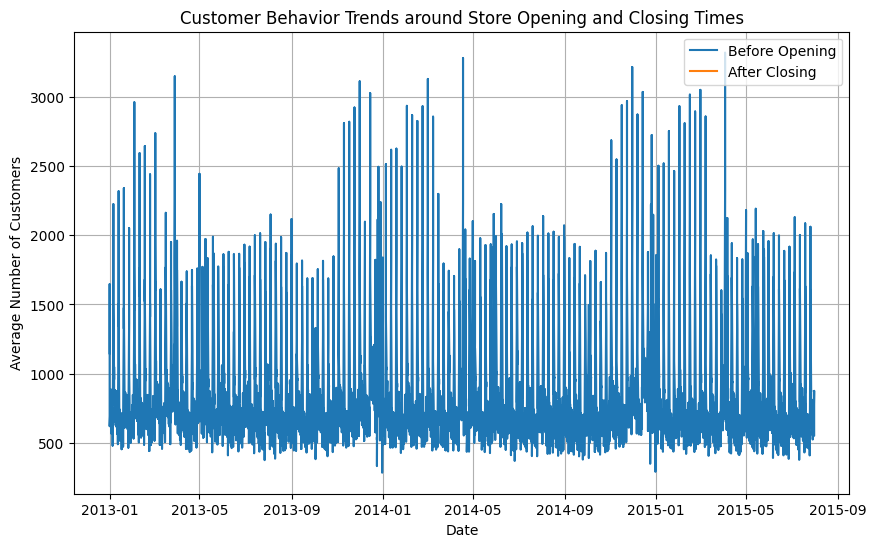

In [49]:
# Plot customer behavior trends
plt.figure(figsize=(10, 6))
plt.plot(open_hours_data.index, avg_customers_before_open, label='Before Opening')
plt.plot(open_hours_data.index, avg_customers_after_close, label='After Closing')
plt.title('Customer Behavior Trends around Store Opening and Closing Times')
plt.xlabel('Date')
plt.ylabel('Average Number of Customers')
plt.legend()
plt.grid(True)
plt.show()

## TASK2

In [50]:
trainData['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [52]:
# Define the mapping
mapping = {'a': 1, '0': 0, 'b': 2, 'c':3, 0:0}

trainData['StateHoliday'] = trainData['StateHoliday'].map(mapping)

trainData['StateHoliday'].unique()

array([ 0., nan])

In [53]:
trainData['SchoolHoliday'].unique()

array([1, 0])

In [54]:
trainData['Date'] = pd.to_datetime(trainData['Date'])
trainData['Date'] = trainData['Date'].dt.normalize()

In [55]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   986159 non-null   float64       
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int32         
 10  Month          1017209 non-null  int32         
 11  Holiday        1017209 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(8)
memory usage: 85.4 MB


In [57]:
# Define the mapping
mapping = {'a': 1, '0': 0, 'b': 2, 'c':3, 0:0}

# Apply the mapping
testData['StateHoliday'] = testData['StateHoliday'].map(mapping)
testData['Date'] = pd.to_datetime(testData['Date'])
testData['Date'] = testData['Date'].dt.normalize()

testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   40908 non-null  float64       
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 2.5 MB


In [58]:
testData['Date'] = testData['Date'].astype(int)

In [60]:
# Convert Date column back to datetime in case it was converted to int
testData['Date'] = pd.to_datetime(testData['Date'])

# Extracting date features
testData['DayOfWeek'] = testData['Date'].dt.dayofweek  # Monday=0, Sunday=6
testData['Weekend'] = testData['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
testData['BeginningOfMonth'] = testData['Date'].dt.day.apply(lambda x: 1 if x <= 10 else 0)
testData['MidMonth'] = testData['Date'].dt.day.apply(lambda x: 1 if 10 < x <= 20 else 0)
testData['EndOfMonth'] = testData['Date'].dt.day.apply(lambda x: 1 if x > 20 else 0)
testData['SchoolHoliday'] = testData['SchoolHoliday'].astype(int)

# Identify holidays
testData['Holiday'] = testData[['StateHoliday', 'SchoolHoliday']].max(axis=1)

# Forward fill to get the date of the next holiday
testData['NextHoliday'] = testData.loc[testData['Holiday'] == 1, 'Date']
testData['NextHoliday'] = testData['NextHoliday'].ffill()

# Backward fill to get the date of the previous holiday
testData['PrevHoliday'] = testData.loc[testData['Holiday'] == 1, 'Date']
testData['PrevHoliday'] = testData['PrevHoliday'].bfill()

# Calculate days to the next holiday
testData['DaysToHoliday'] = (testData['NextHoliday'] - testData['Date']).dt.days

# Calculate days since the last holiday
testData['DaysAfterHoliday'] = (testData['Date'] - testData['PrevHoliday']).dt.days

# Replace NaN values with a large number for non-holiday periods (if necessary)
testData['DaysToHoliday'].fillna(9999, inplace=True)
testData['DaysAfterHoliday'].fillna(9999, inplace=True)

# Drop intermediate columns if not needed
testData.drop(columns=['NextHoliday', 'PrevHoliday'], inplace=True)


C:\Users\Yunus\AppData\Local\Temp\ipykernel_14044\1331353343.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testData['DaysToHoliday'].fillna(9999, inplace=True)
C:\Users\Yunus\AppData\Local\Temp\ipykernel_14044\1331353343.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [61]:
# Extracting date features
trainData['DayOfWeek'] = trainData['Date'].dt.dayofweek  # Monday=0, Sunday=6
trainData['Weekend'] = trainData['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
trainData['BeginningOfMonth'] = trainData['Date'].dt.day.apply(lambda x: 1 if x <= 10 else 0)
trainData['MidMonth'] = trainData['Date'].dt.day.apply(lambda x: 1 if 10 < x <= 20 else 0)
trainData['EndOfMonth'] = trainData['Date'].dt.day.apply(lambda x: 1 if x > 20 else 0)

In [64]:
trainData['SchoolHoliday'] = trainData['SchoolHoliday'].astype(int)

# Identify holidays
trainData['Holiday'] = trainData[['StateHoliday', 'SchoolHoliday']].max(axis=1)

# Forward fill to get the date of the next holiday
trainData['NextHoliday'] = trainData.loc[trainData['Holiday'] == 1, 'Date']
trainData['NextHoliday'] = trainData['NextHoliday'].ffill()

# Backward fill to get the date of the previous holiday
trainData['PrevHoliday'] = trainData.loc[trainData['Holiday'] == 1, 'Date']
trainData['PrevHoliday'] = trainData['PrevHoliday'].bfill()

# Calculate days to the next holiday
trainData['DaysToHoliday'] = (trainData['NextHoliday'] - trainData['Date']).dt.days

# Calculate days since the last holiday
trainData['DaysAfterHoliday'] = (trainData['Date'] - trainData['PrevHoliday']).dt.days

# Replace NaN values with a large number for non-holiday periods (if necessary)
trainData['DaysToHoliday'].fillna(9999, inplace=True)
trainData['DaysAfterHoliday'].fillna(9999, inplace=True)

# Drop intermediate columns if not needed
trainData.drop(columns=['NextHoliday', 'PrevHoliday'], inplace=True)

trainData.info()

C:\Users\Yunus\AppData\Local\Temp\ipykernel_14044\2334064774.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  trainData['DaysToHoliday'].fillna(9999, inplace=True)
C:\Users\Yunus\AppData\Local\Temp\ipykernel_14044\2334064774.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Store             1017209 non-null  int64         
 1   DayOfWeek         1017209 non-null  int32         
 2   Date              1017209 non-null  datetime64[ns]
 3   Sales             1017209 non-null  int64         
 4   Customers         1017209 non-null  int64         
 5   Open              1017209 non-null  int64         
 6   Promo             1017209 non-null  int64         
 7   StateHoliday      986159 non-null   float64       
 8   SchoolHoliday     1017209 non-null  int64         
 9   Year              1017209 non-null  int32         
 10  Month             1017209 non-null  int32         
 11  Holiday           1017209 non-null  float64       
 12  Weekend           1017209 non-null  int64         
 13  BeginningOfMonth  1017209 non-null  int64 

In [66]:
trainData['Store'] = trainData['Store'].astype(int)
trainData['Sales'] = trainData['Sales'].astype(int) // 10**9
trainData['Customers'] = trainData['Customers'].astype(int) // 10**9
trainData['Open'] = trainData['Open'].astype(int) // 10**9
trainData['Promo'] = trainData['Promo'].astype(int)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Store             1017209 non-null  int64         
 1   DayOfWeek         1017209 non-null  int32         
 2   Date              1017209 non-null  datetime64[ns]
 3   Sales             1017209 non-null  int64         
 4   Customers         1017209 non-null  int64         
 5   Open              1017209 non-null  int64         
 6   Promo             1017209 non-null  int64         
 7   StateHoliday      986159 non-null   float64       
 8   SchoolHoliday     1017209 non-null  int64         
 9   Year              1017209 non-null  int32         
 10  Month             1017209 non-null  int32         
 11  Holiday           1017209 non-null  float64       
 12  Weekend           1017209 non-null  int64         
 13  BeginningOfMonth  1017209 non-null  int64 

In [67]:
sampleData['Id'] = sampleData['Id'].astype(int) // 10**9
sampleData['Sales'] = sampleData['Sales'].astype(int) // 10**9
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      41088 non-null  int64
 1   Sales   41088 non-null  int64
dtypes: int64(2)
memory usage: 642.1 KB


In [68]:
eval_merged = pd.merge(sampleData, testData, on='Id')

In [70]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale (removed "Date" to avoid DTypePromotionError)
columns_to_scale = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Weekend', 'Open', 'Promo', 'Store',
                    'BeginningOfMonth', 'MidMonth', 'EndOfMonth', 'Holiday', 'DaysToHoliday', 'DaysAfterHoliday']

# Select columns to scale and drop the rest
trainData_scaled = trainData[columns_to_scale].copy()
testData_scaled = testData[columns_to_scale].copy()

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
trainData_scaled = scaler.fit_transform(trainData_scaled)

# Transform the test data using the same scaler fitted on the training data
testData_scaled = scaler.transform(testData_scaled)

# Convert the scaled arrays back to DataFrame
trainData_scaled = pd.DataFrame(trainData_scaled, columns=columns_to_scale)
testData_scaled = pd.DataFrame(testData_scaled, columns=columns_to_scale)


In [71]:
trainData_scaled.info()
testData_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   DayOfWeek         1017209 non-null  float64
 1   StateHoliday      986159 non-null   float64
 2   SchoolHoliday     1017209 non-null  float64
 3   Weekend           1017209 non-null  float64
 4   Open              1017209 non-null  float64
 5   Promo             1017209 non-null  float64
 6   Store             1017209 non-null  float64
 7   BeginningOfMonth  1017209 non-null  float64
 8   MidMonth          1017209 non-null  float64
 9   EndOfMonth        1017209 non-null  float64
 10  Holiday           1017209 non-null  float64
 11  DaysToHoliday     1017209 non-null  float64
 12  DaysAfterHoliday  1017209 non-null  float64
dtypes: float64(13)
memory usage: 100.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 13 columns):


In [72]:
from sklearn.ensemble import RandomForestRegressor

# Select columns for training and testing
trainMainData = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Weekend', 'Date', 'Open', 'Promo', 'Store'
                 'BeginningOfMonth', 'MidMonth', 'EndOfMonth', 'Holiday', 'DaysToHoliday', 'DaysAfterHoliday']
testMainData = ['DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'Weekend', 'Date', 'Open', 'Promo', 'Store'
                'BeginningOfMonth', 'MidMonth', 'EndOfMonth', 'Holiday', 'DaysToHoliday', 'DaysAfterHoliday']

# Split data into features (X) and target (y)
X_train = trainData_scaled
y_train = trainData['Sales']
X_test = testData_scaled
y_test = sampleData['Sales']

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Fit the model to training data
rf_regressor.fit(X_train, y_train)

# Predict on test data
predictions = rf_regressor.predict(X_test)

# Print predictions
predictions.shape


(41088,)

In [73]:
sampleData.shape

(41088, 2)

In [74]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) between the true and predicted values.

    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.

    Returns:
        float: Mean Absolute Percentage Error (MAPE).
    """
    # Avoid division by zero by adding a small epsilon value
    epsilon = 1e-10

    # Calculate absolute percentage error for each data point
    abs_percentage_error = np.abs((y_true - y_pred) / (y_true + epsilon))

    # Calculate the mean of absolute percentage errors
    mape = np.mean(abs_percentage_error) * 100

    return mape

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 0.00%


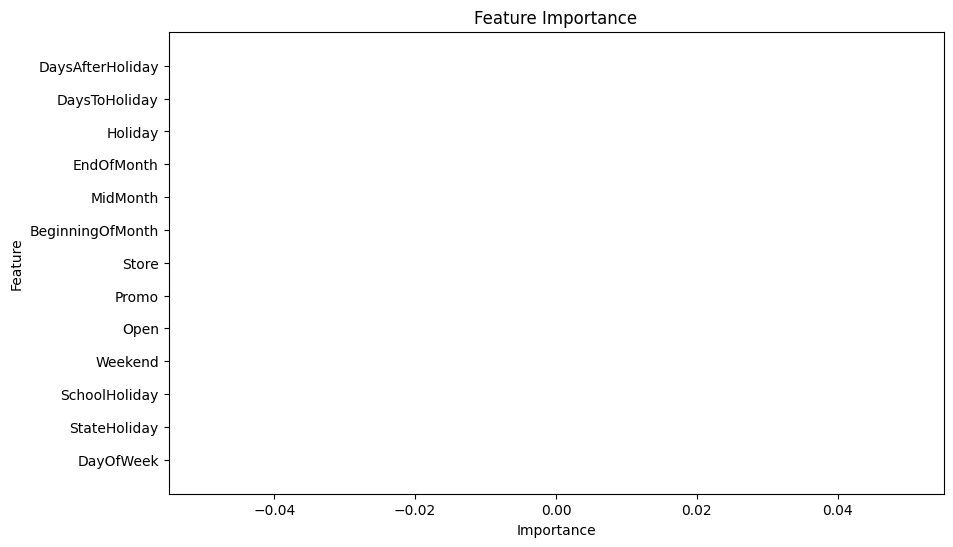

In [75]:
# Assuming rf_regressor is the trained Random Forest Regressor model
feature_importance = rf_regressor.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [76]:
def bootstrap_confidence_interval(model, X, num_iterations=1000, confidence_level=0.95):
    """
    Estimate the confidence interval of predictions using bootstrapping.

    Parameters:
        model: Trained regression model.
        X (array-like): Input features for prediction.
        num_iterations (int): Number of bootstrap iterations.
        confidence_level (float): Confidence level for the interval (e.g., 0.95 for 95% confidence).

    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    predictions = []
    n = len(X)

    # Perform bootstrapping
    for _ in range(num_iterations):
        # Sample with replacement
        indices = np.random.choice(n, size=n, replace=True)
        X_sample = X.iloc[indices]
        # Make predictions on the sample
        y_pred = model.predict(X_sample)
        predictions.extend(y_pred)

    # Calculate confidence interval
    alpha = (1 - confidence_level) / 2
    lower_bound = np.percentile(predictions, alpha * 100)
    upper_bound = np.percentile(predictions, (1 - alpha) * 100)

    return lower_bound, upper_bound

# Example usage:
# Assuming rf_regressor is the trained Random Forest Regressor model
# and X_test is the testing features
lower_bound, upper_bound = bootstrap_confidence_interval(rf_regressor, X_test)
print("Confidence Interval of Predictions: [{:.2f}, {:.2f}]".format(lower_bound, upper_bound))


Confidence Interval of Predictions: [0.00, 0.00]


In [77]:
import pickle
from datetime import datetime

# Assuming rf_regressor is the trained Random Forest Regressor model
# Serialize the model
timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S-%f")
model_filename = f"{timestamp}.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(rf_regressor, file)

print("Model saved as:", model_filename)



Model saved as: 03-10-2025-23-08-40-594746.pkl


In [78]:
# Convert the 'Date' column to datetime format
trainData['Date'] = pd.to_datetime(trainData['Date'])

# Set the 'Date' column as the index
trainData.set_index('Date', inplace=True)

trainData

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Holiday,Weekend,BeginningOfMonth,MidMonth,EndOfMonth,DaysToHoliday,DaysAfterHoliday
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,4,0,0,0,1,0.0,1,2015,7,1.0,0,0,0,1,0,0
2015-07-31,2,4,0,0,0,1,0.0,1,2015,7,1.0,0,0,0,1,0,0
2015-07-31,3,4,0,0,0,1,0.0,1,2015,7,1.0,0,0,0,1,0,0
2015-07-31,4,4,0,0,0,1,0.0,1,2015,7,1.0,0,0,0,1,0,0
2015-07-31,5,4,0,0,0,1,0.0,1,2015,7,1.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,1,0,0,0,0,NaN,1,2013,1,1.0,0,1,0,0,0,0
2013-01-01,1112,1,0,0,0,0,NaN,1,2013,1,1.0,0,1,0,0,0,0
2013-01-01,1113,1,0,0,0,0,NaN,1,2013,1,1.0,0,1,0,0,0,0


In [79]:
trainData['Sales'].unique()

array([0])

In [80]:
import pandas as pd

# Function to create lag features and target variable
def create_supervised_data(data, n_lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(n_lag, 0, -1)]
    columns.append(df.shift(-1))
    df = pd.concat(columns, axis=1)
    df.dropna(inplace=True)
    df.columns = [f'lag_{i}' for i in range(n_lag, 0, -1)] + ['target']
    return df

# Assuming 'Sales' is the column representing sales data in trainData
# Define the number of lag observations
n_lag = 1

# Create supervised learning data
supervised_data = create_supervised_data(trainData['Sales'], n_lag)

# Display the first few rows of the supervised learning data
print(supervised_data.head())


            lag_1  target
Date                     
2015-07-31    0.0     0.0
2015-07-31    0.0     0.0
2015-07-31    0.0     0.0
2015-07-31    0.0     0.0
2015-07-31    0.0     0.0


In [81]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data into the (-1, 1) range
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(supervised_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=supervised_data.columns)

# Display the first few rows of the scaled data
print(scaled_df.head())


   lag_1  target
0   -1.0    -1.0
1   -1.0    -1.0
2   -1.0    -1.0
3   -1.0    -1.0
4   -1.0    -1.0


In [5]:
try:
	scaled_df
	supervised_data
except NameError:
	from sklearn.preprocessing import MinMaxScaler
	# Define create_supervised_data if it is not already defined
	if 'create_supervised_data' not in globals():
		def create_supervised_data(data, n_lag=1):
			df = pd.DataFrame(data)
			columns = [df.shift(i) for i in range(n_lag, 0, -1)]
			columns.append(df.shift(-1))
			df = pd.concat(columns, axis=1)
			df.dropna(inplace=True)
			df.columns = [f'lag_{i}' for i in range(n_lag, 0, -1)] + ['target']
			return df
	# Ensure supervised_data is defined; if not, create it using trainData['Sales'] with n_lag=1.
	if 'supervised_data' not in globals():
		n_lag = 1
		supervised_data = create_supervised_data(trainData['Sales'], n_lag)
	# Re-create scaled_df using supervised_data
	scaled_data = MinMaxScaler(feature_range=(-1, 1)).fit_transform(supervised_data)
	scaled_df = pd.DataFrame(scaled_data, columns=supervised_data.columns)

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Split the supervised learning data into input features (X) and target variable (y)
X = scaled_df.drop('target', axis=1).values
y = scaled_df['target'].values

# Reshape input features to 3D format (samples, time steps, features)
n_samples, n_steps, n_features = X.shape[0], X.shape[1], 1
X = X.reshape((n_samples, n_steps, n_features))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

NameError: name 'trainData' is not defined